<a href="https://colab.research.google.com/github/keinerfan/IAP123/blob/Codes/iap_new_finger_prints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-pa

In [6]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 51.3 MB/s eta 0:00:00


In [8]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors

In [7]:
import pandas as pd
df = pd.read_csv('IAP123_04_bioactivity_data_3class_pIC50.csv')
selection = ['canonical_smiles']
data =  df[selection]
data

,canonical_smiles
0,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...
1,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O
2,CC[C@H](C)[C@H](NC(=O)[C@H]1CCCN1C(=O)[C@@H](N...
3,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...
4,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...
...,...
1635,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...
1636,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...
1637,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...
1638,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...


In [ ]:
df

# rdkit **fingerprints**

In [13]:

#Calculate descriptors using RDkit


def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names



In [14]:
# Function call
Mol_descriptors,desc_names = RDkit_descriptors(data['canonical_smiles'])

df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

Streaming output truncated to the last 5000 lines.
----------
****

[10:15:49] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
----------
Stacktrace:
----------
****

[10:15:49] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
----------
Stacktrace:
----------
****

[10:15:49] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContrib

KeyboardInterrupt: 

# **morgan finger print**

In [12]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)
    return np.array(Morgan_fpts)


In [13]:
Morgan_fpts = morgan_fpts(data['canonical_smiles'])
Morgan_fpts.shape

[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerator
[10:18:56] DEPRECATION WARNING: please use MorganGenerat

(1640, 2048)

In [14]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1636,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1637,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1638,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# **mordred finger print**

In [ ]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]

    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
mordred_descriptors = All_Mordred_descriptors(data['canonical_smiles'])
mordred_descriptors

  0%|          | 3/708 [00:01<07:46,  1.51it/s]


KeyboardInterrupt: 

In [ ]:
mordred_descriptors

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,1,27.804278,2.297672,4.595344,27.804278,1.208882,4.006997,4.247468,0.184673,...,9.633449,56.240689,322.189257,6.575291,1316,31,106.0,117.0,10.027778,5.333333
1,0,1,51.059651,2.470741,4.941483,51.059651,1.245357,4.611301,3.94456,0.096209,...,10.515886,77.909159,582.226054,7.763014,6818,64,204.0,234.0,15.284722,9.208333
2,0,1,50.813242,2.478669,4.957338,50.813242,1.239347,4.613419,3.983061,0.097148,...,10.546578,77.998703,584.266856,7.213171,6780,65,206.0,237.0,15.895833,9.069444
3,0,1,54.63401,2.485138,4.897191,54.63401,1.30081,4.663421,4.839861,0.115235,...,10.597709,93.270677,573.331505,6.745077,6241,71,220.0,259.0,13.055556,9.305556
4,0,1,58.859876,2.484613,4.890026,58.859876,1.307997,4.725931,4.822457,0.107166,...,10.599855,96.443710,609.331505,6.924222,7428,74,232.0,271.0,13.805556,10.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0,2,48.749596,2.539417,4.930391,48.749596,1.282884,4.578051,4.197736,0.110467,...,10.653606,89.806774,523.295868,6.885472,4900,63,208.0,246.0,12.756944,8.013889
704,0,3,48.47806,2.539494,4.935738,48.47806,1.275738,4.578156,4.21776,0.110994,...,10.667443,89.833464,523.332254,6.541653,4869,64,208.0,247.0,12.756944,8.041667
705,0,3,48.47806,2.539494,4.935738,48.47806,1.275738,4.578156,4.21776,0.110994,...,10.667443,89.833464,523.332254,6.541653,4869,64,208.0,247.0,12.756944,8.041667
706,0,3,48.749596,2.539417,4.930391,48.749596,1.282884,4.578051,4.197736,0.110467,...,10.653606,89.806774,523.332254,6.541653,4900,63,208.0,246.0,12.756944,8.013889


In [ ]:
mordred_descriptors = mordred_descriptors.drop( columns=[ 'nAcid' , 'nBase'] ,axis =1 )

KeyError: "['nAcid', 'nBase'] not found in axis"

# **saving descriptors**

In [15]:
df_final_morgan = pd.concat([Morgan_fingerprints , df['pIC50']] , axis =1 )
#df_final_rdkit = pd.concat([df_with_200_descriptors , df['pIC50']], axis =1 )
#df_final_mordred = pd.concat([mordred_descriptors , df['pIC50']], axis =1 )

In [19]:
#df_final_mordred.to_csv('CIAP1_and_CIAP2_06_mordred_fp.csv', index=False)
df_final_morgan.to_csv('IAP123_06_morgan_fp.csv', index=False)
#df_final_rdkit.to_csv('CIAP1_and_CIAP2_06_rdkit_fp.csv', index=False)

In [17]:
df_final_morgan

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.244125
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.387216
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.552842
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.548214
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.244125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.847712
1636,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.818156
1637,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.869666
1638,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.216096


# checking for rkkit fingerprint **bold text**

epoch:0 and loss : 1.0160319805145264
epoch:100 and loss : 0.8866918683052063
epoch:200 and loss : 0.6784316301345825
epoch:300 and loss : 0.4659228026866913
epoch:400 and loss : 0.35417184233665466
epoch:500 and loss : 0.2947023808956146
epoch:600 and loss : 0.25236818194389343
epoch:700 and loss : 0.21796242892742157
epoch:800 and loss : 0.18981683254241943
epoch:900 and loss : 0.16706280410289764
epoch:1000 and loss : 0.1490832418203354
epoch:1100 and loss : 0.1346379816532135
epoch:1200 and loss : 0.12307419627904892
epoch:1300 and loss : 0.11331896483898163
epoch:1400 and loss : 0.10418577492237091
epoch:1500 and loss : 0.09659132361412048
epoch:1600 and loss : 0.09018570184707642
epoch:1700 and loss : 0.0847729742527008
epoch:1800 and loss : 0.07989031076431274
epoch:1900 and loss : 0.07595327496528625
epoch:2000 and loss : 0.07251117378473282
epoch:2100 and loss : 0.06950616091489792
epoch:2200 and loss : 0.06672848761081696
epoch:2300 and loss : 0.06436627358198166
epoch:2400 a

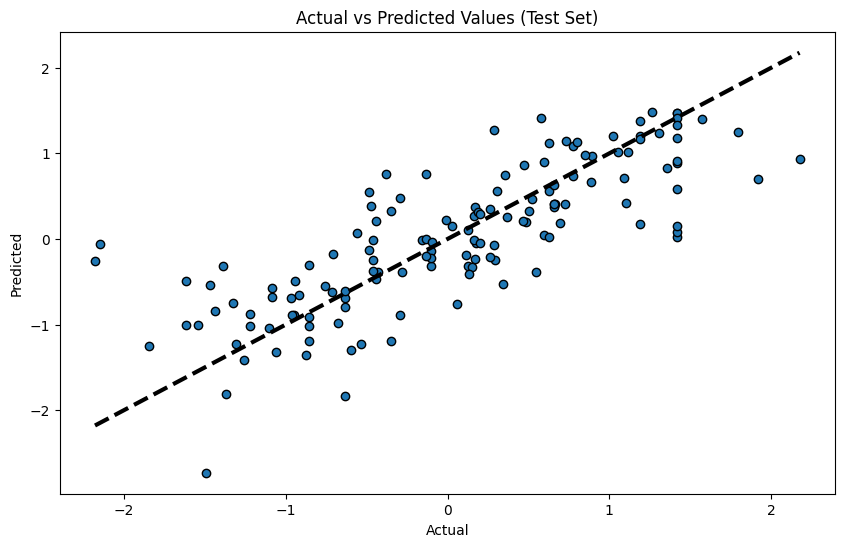

Training Set Metrics:
R-Squared: 0.9462653492164377
Adjusted R-Squared: 0.9386665097116915
Mean Squared Error (MSE): 0.05373465269804001
Mean Absolute Error (MAE): 0.13503386080265045
Mean Absolute Percentage Error (MAPE): 47.512611746788025

Testing Set Metrics:
R-Squared: 0.6188041050461379
Adjusted R-Squared: 0.2429771663592316
Mean Squared Error (MSE): 0.3327665328979492
Mean Absolute Error (MAE): 0.426065593957901
Mean Absolute Percentage Error (MAPE): 109.23362970352173


In [ ]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_rdkit_fp.csv")
data.fillna(data.mean(), inplace=True)
y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )
# Feature selection using VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))

merged_data = selection.fit_transform(merged_data_temp)

# Prepare X and y
x = merged_data


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()

# Create DataLoader for training
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(70, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

mlp = MLP()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

epochs =3000
losses = []
for i in range (epochs) :
  #go forward
  y_pred = mlp.forward(X_train)
  #measure loss
  loss =  loss_function(y_pred , y_train)
  losses.append(loss.detach().numpy())
  if i % 100 == 0 :
    print(f'epoch:{i} and loss : {loss}')
  #back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = mlp(X_train)
y_test_pred = mlp(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

In [ ]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_rdkit_fp.csv")
data.fillna(data.mean(), inplace=True)
y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )
# Feature selection using VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))

merged_data = selection.fit_transform(merged_data_temp)

# Prepare X and y
x = merged_data


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()

# Create DataLoader for training
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)


In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size)
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc_out(out)
        return out

# Define hyperparameters
input_size = 70
hidden_size = 1024
dropout_rate = 0.80
output_size = 1
learning_rate = 0.001


Epoch:   0 Training loss: 1.70
Epoch:  10 Training loss: 0.51
Epoch:  20 Training loss: 0.44
Epoch:  30 Training loss: 0.37
Epoch:  40 Training loss: 0.35
Epoch:  50 Training loss: 0.31
Epoch:  60 Training loss: 0.28
Epoch:  70 Training loss: 0.28
Epoch:  80 Training loss: 0.26
Epoch:  90 Training loss: 0.26
Epoch: 100 Training loss: 0.23
Epoch: 110 Training loss: 0.24
Epoch: 120 Training loss: 0.22
Epoch: 130 Training loss: 0.22
Epoch: 140 Training loss: 0.20
Epoch: 150 Training loss: 0.20
Epoch: 160 Training loss: 0.20
Epoch: 170 Training loss: 0.20
Epoch: 180 Training loss: 0.18
Epoch: 190 Training loss: 0.18


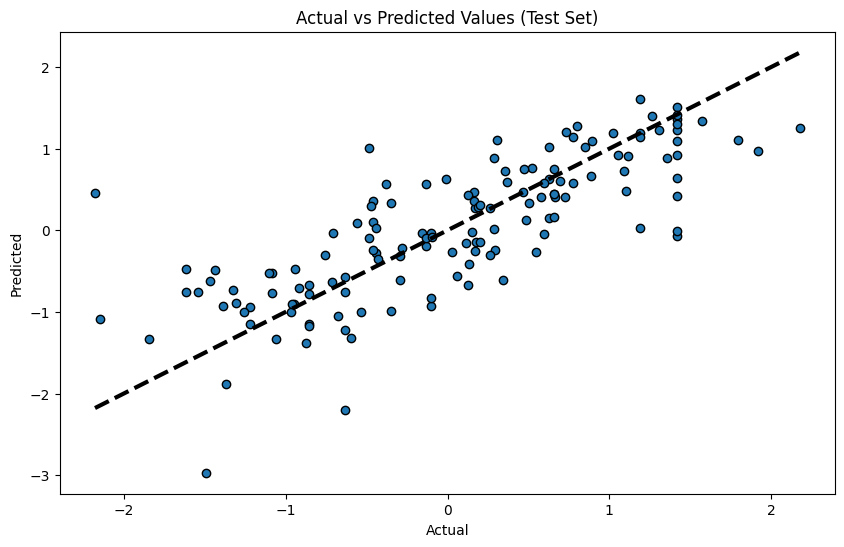

Training Set Metrics:
R-Squared: 0.9262430919202098
Adjusted R-Squared: 0.9158128220907445
Mean Squared Error (MSE): 0.07375690340995789
Mean Absolute Error (MAE): 0.18060462176799774
Mean Absolute Percentage Error (MAPE): 61.031997203826904

Testing Set Metrics:
R-Squared: 0.6004006259133028
Adjusted R-Squared: 0.20642941202500975
Mean Squared Error (MSE): 0.3488319218158722
Mean Absolute Error (MAE): 0.4403044879436493
Mean Absolute Percentage Error (MAPE): 150.2308487892151


In [ ]:
# Initialize model, criterion, and optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
epochs = 200
for e in range(epochs):
    running_loss = 0
    for fps, labels in train_loader:
        optimizer.zero_grad()
        output = model(fps)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        if e % 10 == 0:
            print(f"Epoch: {e:3d} Training loss: {running_loss / len(train_loader):.2f}")

# Evaluation on test set
model.eval()
y_pred_test = model(X_test)

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = mlp(X_train)
y_test_pred = mlp(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# rdkit with **pca**

In [ ]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_rdkit_fp.csv")
data.fillna(data.mean(), inplace=True)
y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )
# Feature selection using VarianceThreshold
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(data)
merged_data = pca.transform()
# Prepare X and y
x = merged_data


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()

# Create DataLoader for training
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(50, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

mlp = MLP()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

epochs =1500
losses = []
for i in range (epochs) :
  #go forward
  y_pred = mlp.forward(X_train)
  #measure loss
  loss =  loss_function(y_pred , y_train)
  losses.append(loss.detach().numpy())
  if i % 100 == 0 :
    print(f'epoch:{i} and loss : {loss}')
  #back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = mlp(X_train)
y_test_pred = mlp(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# **model checking for modred** not working

<ipython-input-12-9db5f842b272>:21: DtypeWarning: Columns (871,887,1111,1190,1567,1570,1571) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CIAP1_and_CIAP2_06_mordred_fp.csv")


epoch: 0 and loss: 13489980.0
epoch: 100 and loss: 3496.9541015625
epoch: 200 and loss: 978.8131103515625
epoch: 300 and loss: 505.2203674316406
epoch: 400 and loss: 344.5552062988281
epoch: 500 and loss: 259.43072509765625
epoch: 600 and loss: 206.88839721679688
epoch: 700 and loss: 171.95590209960938
epoch: 800 and loss: 147.05421447753906
epoch: 900 and loss: 128.79579162597656
epoch: 1000 and loss: 114.37952423095703
epoch: 1100 and loss: 103.41658782958984
epoch: 1200 and loss: 94.72640228271484
epoch: 1300 and loss: 87.26065826416016
epoch: 1400 and loss: 80.86368560791016


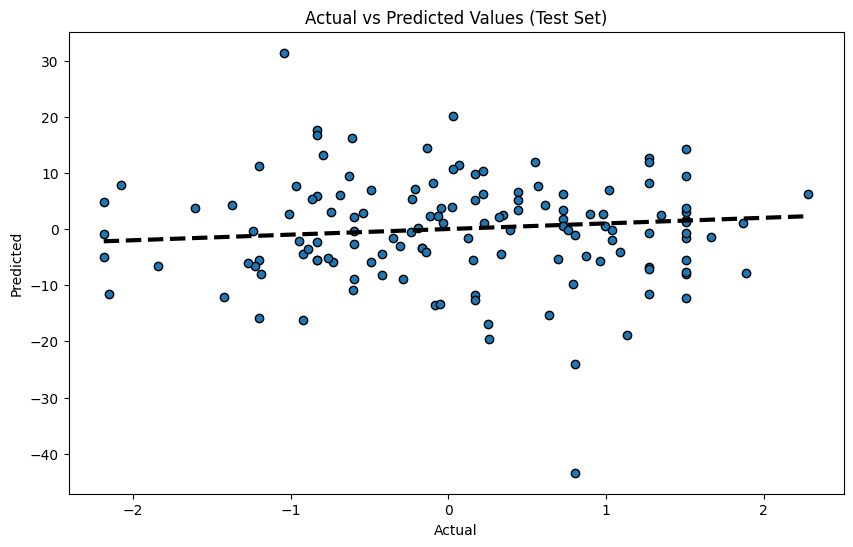

Training Set Metrics:
R-Squared: -73.98031348763415
Adjusted R-Squared: 201.57233857942134
Mean Squared Error (MSE): 74.98030853271484
Mean Absolute Error (MAE): 6.519451141357422
Mean Absolute Percentage Error (MAPE): 3612.0227813720703

Testing Set Metrics:
R-Squared: -89.17136401210523
Adjusted R-Squared: 21.10476335710832
Mean Squared Error (MSE): 90.34532928466797
Mean Absolute Error (MAE): 7.019310474395752
Mean Absolute Percentage Error (MAPE): 2744.5579528808594


In [ ]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_mordred_fp.csv")
# Drop rows with any NaN values
data = data.dropna()
def is_string(x):
    return isinstance(x, str)

# Identify columns that contain any strings
cols_with_strings = data.columns[data.applymap(is_string).any()]

# Drop those columns
data = data.drop(columns=cols_with_strings)

# Feature selection using VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
merged_data_temp = data.drop(columns=['pIC50'])

merged_data = selection.fit_transform(merged_data_temp)

# Prepare X and y
x = merged_data
y = data.pIC50.values.reshape((-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()

# Create DataLoader for training
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

class MLP(nn.Module):
    '''
    Multilayer Perceptron for regression.
    '''
    def __init__(self, input_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        '''
        Forward pass
        '''
        return self.layers(x)

mlp = MLP(X_train.shape[1])
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

epochs = 1500
losses = []
for i in range(epochs):
    # Forward pass
    y_pred = mlp.forward(X_train)
    # Measure loss
    loss = loss_function(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i % 100 == 0:
        print(f'epoch: {i} and loss: {loss}')
    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Model evaluation
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

y_train_pred = mlp(X_train)
y_test_pred = mlp(X_test)

# Converting to numpy arrays
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size)
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc_out(out)
        return out

# Define hyperparameters
input_size = 70
hidden_size = 1024
dropout_rate = 0.80
output_size = 1
learning_rate = 0.001


In [ ]:
# Initialize model, criterion, and optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
epochs = 200
for e in range(epochs):
    running_loss = 0
    for fps, labels in train_loader:
        optimizer.zero_grad()
        output = model(fps)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        if e % 10 == 0:
            print(f"Epoch: {e:3d} Training loss: {running_loss / len(train_loader):.2f}")

# Evaluation on test set
model.eval()
y_pred_test = model(X_test)

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = mlp(X_train)
y_test_pred = mlp(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


Epoch:   0 Training loss: 1.48
Epoch:  10 Training loss: 0.52
Epoch:  20 Training loss: 0.36
Epoch:  30 Training loss: 0.36
Epoch:  40 Training loss: 0.35
Epoch:  50 Training loss: 0.30
Epoch:  60 Training loss: 0.27
Epoch:  70 Training loss: 0.26
Epoch:  80 Training loss: 0.25
Epoch:  90 Training loss: 0.23
Epoch: 100 Training loss: 0.23
Epoch: 110 Training loss: 0.22
Epoch: 120 Training loss: 0.22
Epoch: 130 Training loss: 0.20
Epoch: 140 Training loss: 0.21
Epoch: 150 Training loss: 0.20
Epoch: 160 Training loss: 0.20
Epoch: 170 Training loss: 0.17
Epoch: 180 Training loss: 0.20


# **model checking for morgan**

In [18]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_morgan_fp.csv")

# Feature selection using VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
merged_data_temp = data.drop(columns=['pIC50'])
merged_data = selection.fit_transform(merged_data_temp)

# Prepare X and y
x = merged_data
y = data.pIC50.values.reshape((-1,1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()

# Create DataLoader for training
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(70, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

mlp = MLP()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

epochs =2000
losses = []
for i in range (epochs) :
  #go forward
  y_pred = mlp.forward(X_train)
  #measure loss
  loss =  loss_function(y_pred , y_train)
  losses.append(loss.detach().numpy())
  if i % 100 == 0 :
    print(f'epoch:{i} and loss : {loss}')
  #back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = mlp(X_train)
y_test_pred = mlp(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

KeyboardInterrupt: 

morgan with another model
## **New Section**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_morgan_fp.csv")

# Feature selection using VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
merged_data_temp = data.drop(columns=['pIC50'])
merged_data = selection.fit_transform(merged_data_temp)

# Prepare X and y
x = merged_data
y = data.pIC50.values.reshape((-1,1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()

# Create DataLoader for training
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)


In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size)
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc_out(out)
        return out

# Define hyperparameters
input_size = 70
hidden_size = 1024
dropout_rate = 0.80
output_size = 1
learning_rate = 0.001


Epoch:   0 Training loss: 1.48
Epoch:  10 Training loss: 0.52
Epoch:  20 Training loss: 0.36
Epoch:  30 Training loss: 0.36
Epoch:  40 Training loss: 0.35
Epoch:  50 Training loss: 0.30
Epoch:  60 Training loss: 0.27
Epoch:  70 Training loss: 0.26
Epoch:  80 Training loss: 0.25
Epoch:  90 Training loss: 0.23
Epoch: 100 Training loss: 0.23
Epoch: 110 Training loss: 0.22
Epoch: 120 Training loss: 0.22
Epoch: 130 Training loss: 0.20
Epoch: 140 Training loss: 0.21
Epoch: 150 Training loss: 0.20
Epoch: 160 Training loss: 0.20
Epoch: 170 Training loss: 0.17
Epoch: 180 Training loss: 0.20
Epoch: 190 Training loss: 0.18


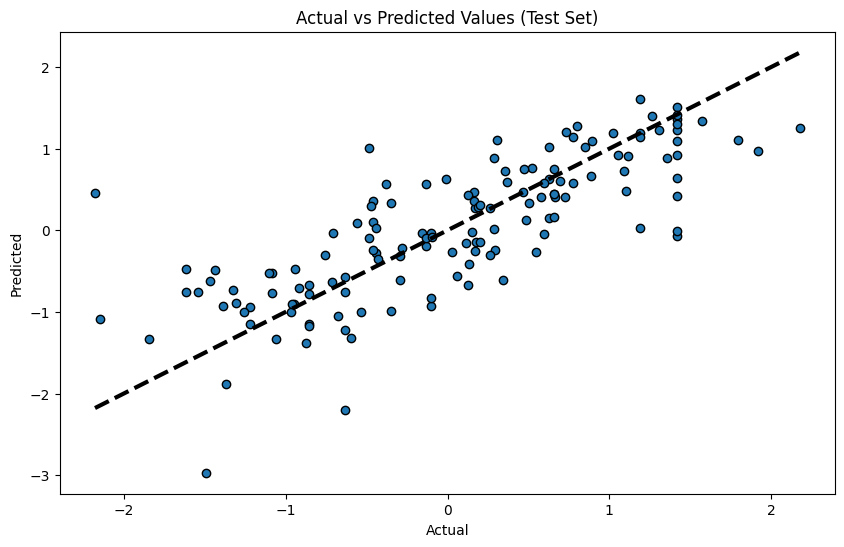

Training Set Metrics:
R-Squared: 0.9262430919202098
Adjusted R-Squared: 0.9158128220907445
Mean Squared Error (MSE): 0.07375690340995789
Mean Absolute Error (MAE): 0.18060462176799774
Mean Absolute Percentage Error (MAPE): 61.031997203826904

Testing Set Metrics:
R-Squared: 0.6004006259133028
Adjusted R-Squared: 0.20642941202500975
Mean Squared Error (MSE): 0.3488319218158722
Mean Absolute Error (MAE): 0.4403044879436493
Mean Absolute Percentage Error (MAPE): 150.2308487892151


In [ ]:
# Initialize model, criterion, and optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
epochs = 200
for e in range(epochs):
    running_loss = 0
    for fps, labels in train_loader:
        optimizer.zero_grad()
        output = model(fps)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        if e % 10 == 0:
            print(f"Epoch: {e:3d} Training loss: {running_loss / len(train_loader):.2f}")

# Evaluation on test set
model.eval()
y_pred_test = model(X_test)

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = mlp(X_train)
y_test_pred = mlp(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **morgan with pca**

epoch:0 and loss : 1.0038175582885742
epoch:100 and loss : 0.8271176218986511
epoch:200 and loss : 0.5474575757980347
epoch:300 and loss : 0.268144428730011
epoch:400 and loss : 0.17414705455303192
epoch:500 and loss : 0.14894896745681763
epoch:600 and loss : 0.13377386331558228
epoch:700 and loss : 0.12188944220542908
epoch:800 and loss : 0.11173588037490845
epoch:900 and loss : 0.1026439294219017
epoch:1000 and loss : 0.09452144056558609
epoch:1100 and loss : 0.08700103312730789
epoch:1200 and loss : 0.08003174513578415
epoch:1300 and loss : 0.0735921561717987
epoch:1400 and loss : 0.06778302788734436
epoch:1500 and loss : 0.062274206429719925
epoch:1600 and loss : 0.057060375809669495
epoch:1700 and loss : 0.05229128897190094
epoch:1800 and loss : 0.04792145639657974
epoch:1900 and loss : 0.043597087264060974


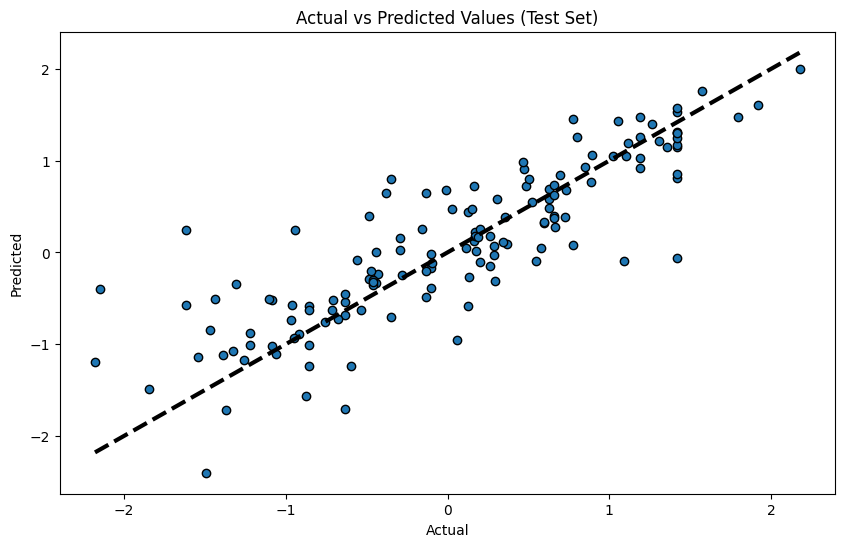

Training Set Metrics:
R-Squared: 0.9602127708391515
Adjusted R-Squared: 0.9563499330565448
Mean Squared Error (MSE): 0.039787229150533676
Mean Absolute Error (MAE): 0.13408701121807098
Mean Absolute Percentage Error (MAPE): 42.99156665802002

Testing Set Metrics:
R-Squared: 0.7221055890598794
Adjusted R-Squared: 0.5694163522795934
Mean Squared Error (MSE): 0.2425890862941742
Mean Absolute Error (MAE): 0.3504968285560608
Mean Absolute Percentage Error (MAPE): 142.03202724456787


In [ ]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_morgan_fp.csv")
data.fillna(data.mean(), inplace=True)
y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )
# Feature selection using VarianceThreshold
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(data)
merged_data = pca.transform(data)
# Prepare X and y
x = merged_data


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()

# Create DataLoader for training
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)

class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(50, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

mlp = MLP()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

epochs =2000
losses = []
for i in range (epochs) :
  #go forward
  y_pred = mlp.forward(X_train)
  #measure loss
  loss =  loss_function(y_pred , y_train)
  losses.append(loss.detach().numpy())
  if i % 100 == 0 :
    print(f'epoch:{i} and loss : {loss}')
  #back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = mlp(X_train)
y_test_pred = mlp(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

# **pca with model 2**

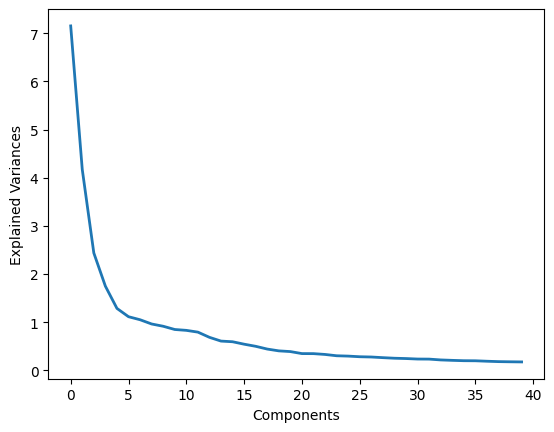

In [ ]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""
from matplotlib.pyplot import plot, xlabel, ylabel, show
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_morgan_fp.csv")
data.fillna(data.mean(), inplace=True)
y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )
# Feature selection using VarianceThreshold
from sklearn.decomposition import PCA

pca = PCA(n_components=40)
pca.fit(data)
merged_data = pca.transform(data)
plot(pca.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variances')  # Corrected spelling
plt.show()  # Corrected function call

# Prepare X and y
x = merged_data


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()

# Create DataLoader for training
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)


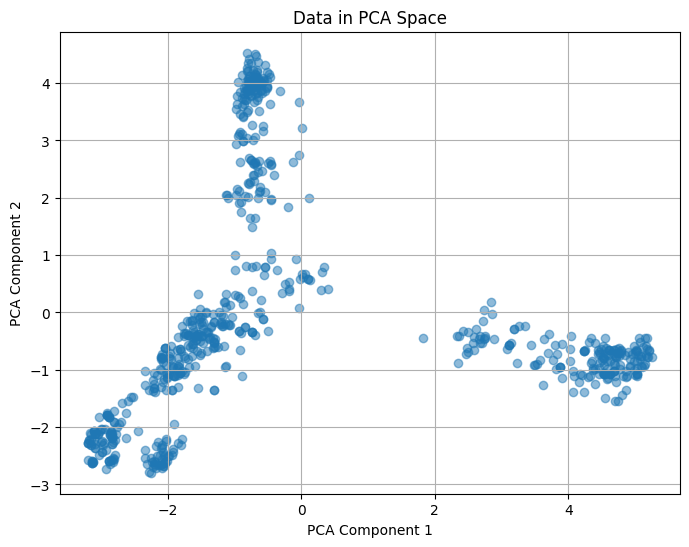

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(merged_data[:, 0], merged_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size)
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc_out(out)
        return out

# Define hyperparameters
input_size = 40
hidden_size = 1024
dropout_rate = 0.80
output_size = 1
learning_rate = 0.001


In [ ]:
# Initialize model, criterion, and optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
epochs = 200
for e in range(epochs):
    running_loss = 0
    for fps, labels in train_loader:
        optimizer.zero_grad()
        output = model(fps)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        if e % 10 == 0:
            print(f"Epoch: {e:3d} Training loss: {running_loss / len(train_loader):.2f}")

# Evaluation on test set
model.eval()
y_pred_test = model(X_test)

Epoch:   0 Training loss: 1.51
Epoch:  10 Training loss: 0.34
Epoch:  20 Training loss: 0.27
Epoch:  30 Training loss: 0.24
Epoch:  40 Training loss: 0.23
Epoch:  50 Training loss: 0.20
Epoch:  60 Training loss: 0.19
Epoch:  70 Training loss: 0.21
Epoch:  80 Training loss: 0.18
Epoch:  90 Training loss: 0.17
Epoch: 100 Training loss: 0.16
Epoch: 110 Training loss: 0.18
Epoch: 120 Training loss: 0.17
Epoch: 130 Training loss: 0.16
Epoch: 140 Training loss: 0.15
Epoch: 150 Training loss: 0.15
Epoch: 160 Training loss: 0.14
Epoch: 170 Training loss: 0.14
Epoch: 180 Training loss: 0.14
Epoch: 190 Training loss: 0.13


NameError: name 'mlp' is not defined

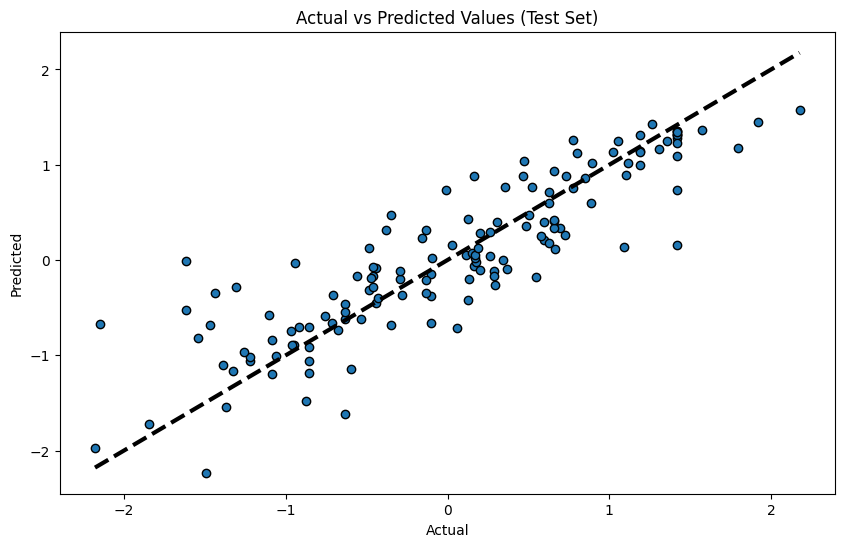

Training Set Metrics:
R-Squared: 0.927402013525612
Adjusted R-Squared: 0.9218707383656587
Mean Squared Error (MSE): 0.07259798794984818
Mean Absolute Error (MAE): 0.19492517411708832
Mean Absolute Percentage Error (MAPE): 62.90661096572876

Testing Set Metrics:
R-Squared: 0.775882528632927
Adjusted R-Squared: 0.687123134032106
Mean Squared Error (MSE): 0.1956443041563034
Mean Absolute Error (MAE): 0.3249981701374054
Mean Absolute Percentage Error (MAPE): 133.5168957710266


In [ ]:

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = model(X_train)
y_test_pred = model(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')